In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs

In [3]:
headers = {'User-Agent': 'Chrome/89.0.4389.72'}

In [4]:
url = 'https://finfo-api.vndirect.com.vn/v4/stock_prices?sort=date&q=code:VCB&size=15&page={}'

In [26]:
final_info = []
for i in range(1,5):
    response = requests.get(url.format(i), headers=headers)
    infos = response.json()['data']
    for info in infos:
        date = info['date']
        open_ = info['open']
        high = info['high']
        low = info['low']
        close = info['close']
        avg = info['average']
        final_info.append((date, open_, high, low, close, avg))

In [47]:
vcb = pd.DataFrame(final_info, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Average'])
vcb.to_csv('QuangNM31_PYE Practice T02.csv')

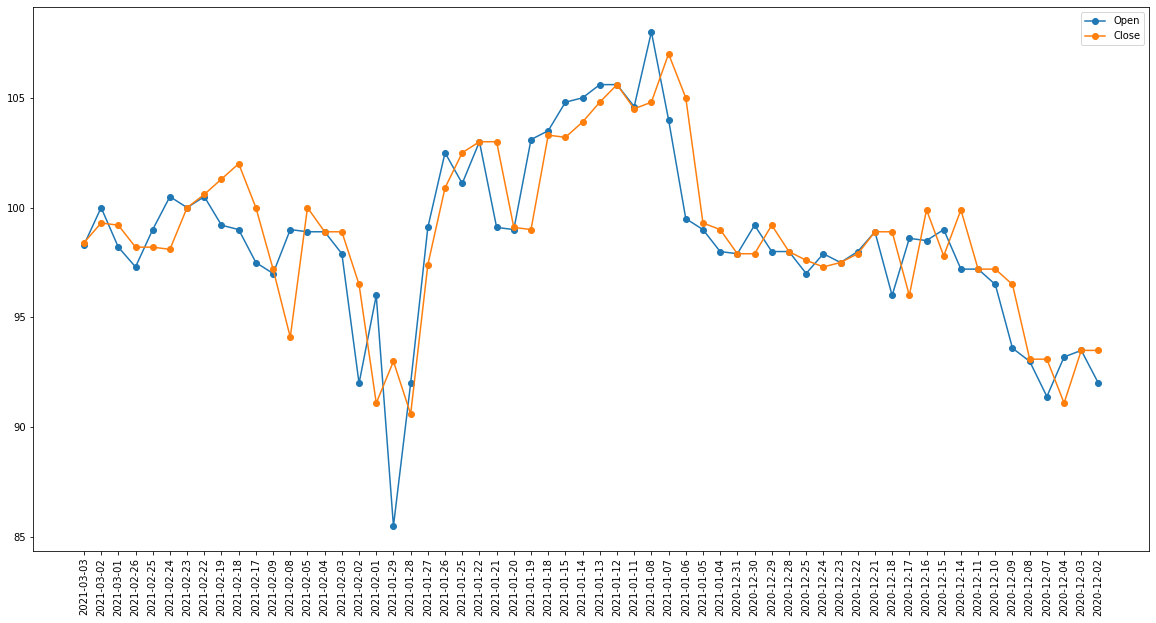

In [46]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
plt.xticks(rotation = 90)
ax.plot_date(vcb['Date'], vcb['Open'], label="Open", linestyle="-")
ax.plot_date(vcb['Date'], vcb['Close'], label="Close", linestyle="-")
ax.legend()
plt.show()